In [2]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 47.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.22.1 which is incompatible.


In [3]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [4]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

In [5]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2025-09-10 04:14:48--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.162.16, 52.216.95.133, 16.15.194.225, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.162.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  24.3MB/s    in 0.5s    

2025-09-10 04:14:49 (24.3 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [6]:
import os

fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [7]:
import numpy as np

temperature = np.zeros((len(lines),))
raw_data_original = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data_original[i, :] = values[:]


num_train_samples = int(0.5 * len(raw_data_original))
num_val_samples = int(0.25 * len(raw_data_original))
num_test_samples = len(raw_data_original) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [8]:
mean = raw_data_original[:num_train_samples].mean(axis=0)
raw_data_original -= mean
std = raw_data_original[:num_train_samples].std(axis=0)
raw_data_original /= std

In [9]:
import numpy as np
import keras

int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [10]:
print(raw_data_original[0])

[ 0.91365151 -1.92064015 -1.97449272 -1.86625827  1.04801712 -1.29131928
 -1.46715535 -0.78234525 -1.47012583 -1.4720352   2.12415558 -0.73016651
 -0.77935289 -0.28119316]


0 iteration removing  "Date Time"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 61s 70ms/step - loss: 30.3217 - mae: 4.0664 - val_loss: 11.0312 - val_mae: 2.5150
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - loss: 15.2428 - mae: 3.0121 - val_loss: 9.2639 - val_mae: 2.3384
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 14.2780 - mae: 2.9184 - val_loss: 9.1006 - val_mae: 2.3304
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 13.7666 - mae: 2.8671 - val_loss: 8.8413 - val_mae: 2.2999
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 13.3169 - mae: 2.8280 - val_loss: 8.9038 - val_mae: 2.3073
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.8602 - mae: 2.7805 - val_loss: 8.8216 - val_mae: 2.2949
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 51s 62ms/step - loss: 12.5464 - mae: 2.7465 - val_loss: 8.9146 - val_mae: 2.3088
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - loss: 12.1833 - mae: 2.7074 - val_loss: 8.7791 - val_mae: 2.29

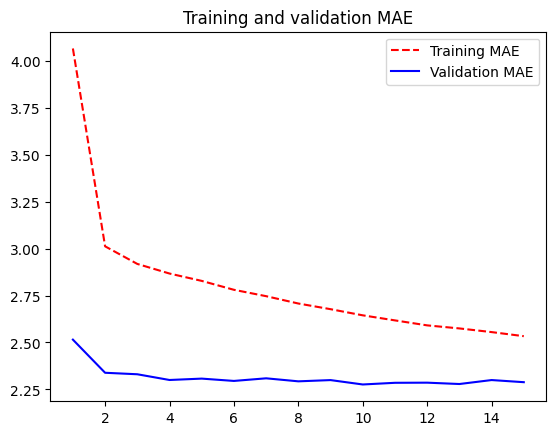



1 iteration removing  "p (mbar)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - loss: 29.9942 - mae: 4.0381 - val_loss: 10.7643 - val_mae: 2.4809
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - loss: 15.0310 - mae: 2.9896 - val_loss: 9.2170 - val_mae: 2.3352
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 13.9900 - mae: 2.8925 - val_loss: 8.7825 - val_mae: 2.2884
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.5452 - mae: 2.8497 - val_loss: 8.9095 - val_mae: 2.3089
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 13.1741 - mae: 2.8108 - val_loss: 8.6518 - val_mae: 2.2738
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 12.7562 - mae: 2.7661 - val_loss: 8.5618 - val_mae: 2.2602
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.4207 - mae: 2.7314 - val_loss: 8.4199 - val_mae: 2.2366
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 12.1111 - mae: 2.6999 - val_loss: 8.5403 - val_mae: 2.2

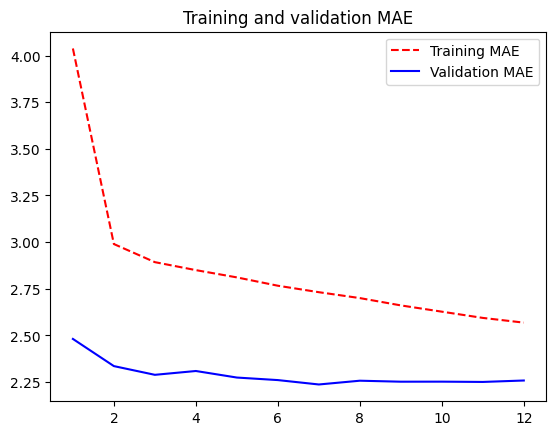



2 iteration removing  "T (degC)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - loss: 28.5266 - mae: 3.9515 - val_loss: 10.5822 - val_mae: 2.4725
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - loss: 15.0370 - mae: 2.9934 - val_loss: 9.1136 - val_mae: 2.3259
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - loss: 14.0530 - mae: 2.8978 - val_loss: 8.9374 - val_mae: 2.3156
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.6092 - mae: 2.8540 - val_loss: 8.9707 - val_mae: 2.3268
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - loss: 13.1703 - mae: 2.8083 - val_loss: 8.6954 - val_mae: 2.2841
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.7170 - mae: 2.7611 - val_loss: 8.9764 - val_mae: 2.3274
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - loss: 12.4663 - mae: 2.7371 - val_loss: 8.5930 - val_mae: 2.2777
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.0891 - mae: 2.6978 - val_loss: 8.7362 - val_mae: 2.2

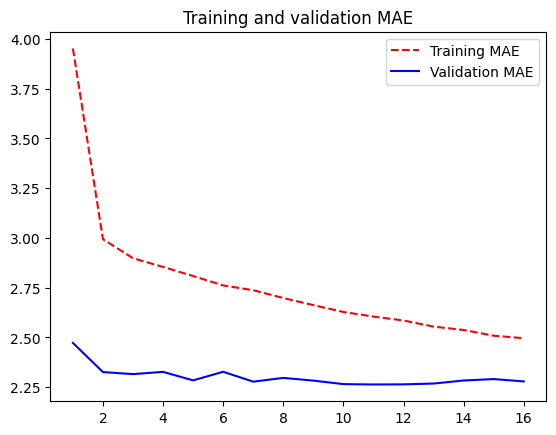



3 iteration removing  "Tpot (K)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - loss: 32.3222 - mae: 4.1805 - val_loss: 11.5770 - val_mae: 2.5602
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - loss: 15.1114 - mae: 2.9970 - val_loss: 9.4957 - val_mae: 2.3696
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - loss: 14.0256 - mae: 2.8930 - val_loss: 9.2503 - val_mae: 2.3630
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 13.3975 - mae: 2.8341 - val_loss: 8.7022 - val_mae: 2.2932
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - loss: 13.0411 - mae: 2.7960 - val_loss: 8.7682 - val_mae: 2.3020
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - loss: 12.7152 - mae: 2.7649 - val_loss: 8.5218 - val_mae: 2.2657
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 12.3995 - mae: 2.7316 - val_loss: 8.6050 - val_mae: 2.2750
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 12.0430 - mae: 2.6922 - val_loss: 8.5947 - val_mae: 2.2

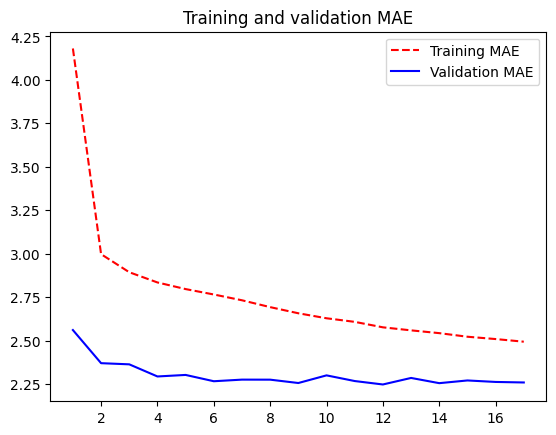



4 iteration removing  "Tdew (degC)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 62s 71ms/step - loss: 31.3939 - mae: 4.1221 - val_loss: 10.8319 - val_mae: 2.4845
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - loss: 15.0698 - mae: 3.0016 - val_loss: 9.2077 - val_mae: 2.3329
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 78s 51ms/step - loss: 14.0213 - mae: 2.8987 - val_loss: 8.6704 - val_mae: 2.2738
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - loss: 13.5531 - mae: 2.8495 - val_loss: 8.6107 - val_mae: 2.2713
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.0618 - mae: 2.8001 - val_loss: 8.4400 - val_mae: 2.2452
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 12.6842 - mae: 2.7576 - val_loss: 8.3918 - val_mae: 2.2398
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.3737 - mae: 2.7257 - val_loss: 8.4160 - val_mae: 2.2474
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 12.0686 - mae: 2.6910 - val_loss: 8.4473 - val_mae: 

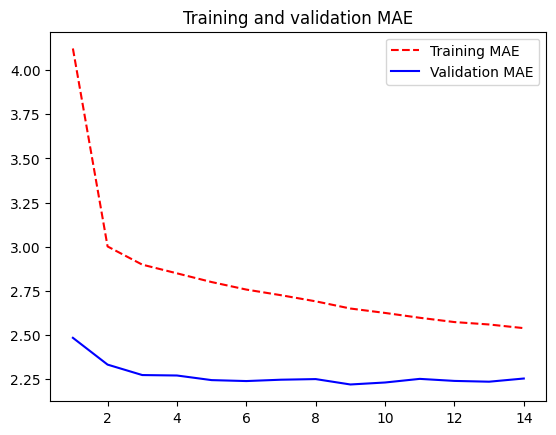



5 iteration removing  "rh (%)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - loss: 28.9286 - mae: 3.9768 - val_loss: 10.9137 - val_mae: 2.5189
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - loss: 14.9621 - mae: 2.9920 - val_loss: 9.5235 - val_mae: 2.3908
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.7623 - mae: 2.8750 - val_loss: 8.7703 - val_mae: 2.2872
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 13.1893 - mae: 2.8120 - val_loss: 8.8536 - val_mae: 2.3089
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.8118 - mae: 2.7720 - val_loss: 8.7465 - val_mae: 2.2938
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.5124 - mae: 2.7376 - val_loss: 8.6416 - val_mae: 2.2841
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.1048 - mae: 2.6975 - val_loss: 8.6868 - val_mae: 2.2855
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 11.7843 - mae: 2.6618 - val_loss: 8.5784 - val_mae: 2.273

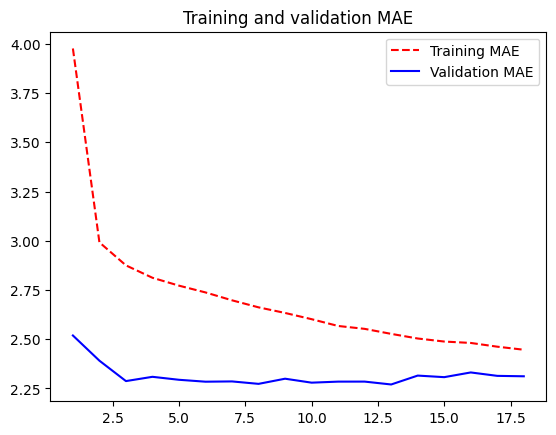



6 iteration removing  "VPmax (mbar)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 61ms/step - loss: 31.2073 - mae: 4.0980 - val_loss: 11.1919 - val_mae: 2.5228
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - loss: 15.0027 - mae: 2.9874 - val_loss: 9.2742 - val_mae: 2.3379
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - loss: 13.9613 - mae: 2.8865 - val_loss: 9.3527 - val_mae: 2.3684
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 13.4981 - mae: 2.8402 - val_loss: 8.7802 - val_mae: 2.2893
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 13.0778 - mae: 2.7979 - val_loss: 8.6626 - val_mae: 2.2755
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 12.7103 - mae: 2.7573 - val_loss: 8.4780 - val_mae: 2.2456
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - loss: 12.3606 - mae: 2.7209 - val_loss: 8.5205 - val_mae: 2.2558
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 11.9972 - mae: 2.6854 - val_loss: 8.3954 - val_mae:

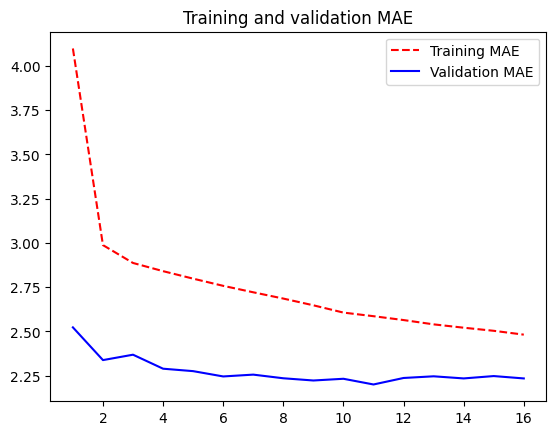



7 iteration removing  "VPact (mbar)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - loss: 31.8233 - mae: 4.1512 - val_loss: 11.2260 - val_mae: 2.5279
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 75s 52ms/step - loss: 15.2518 - mae: 3.0117 - val_loss: 9.3230 - val_mae: 2.3448
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/step - loss: 14.0520 - mae: 2.9001 - val_loss: 9.0577 - val_mae: 2.3321
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 73s 51ms/step - loss: 13.6468 - mae: 2.8561 - val_loss: 8.9749 - val_mae: 2.3187
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 13.2728 - mae: 2.8197 - val_loss: 8.9437 - val_mae: 2.3247
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 12.8874 - mae: 2.7793 - val_loss: 8.8443 - val_mae: 2.3084
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 12.5675 - mae: 2.7479 - val_loss: 8.6517 - val_mae: 2.2823
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.1720 - mae: 2.7037 - val_loss: 8.6315 - val_mae:

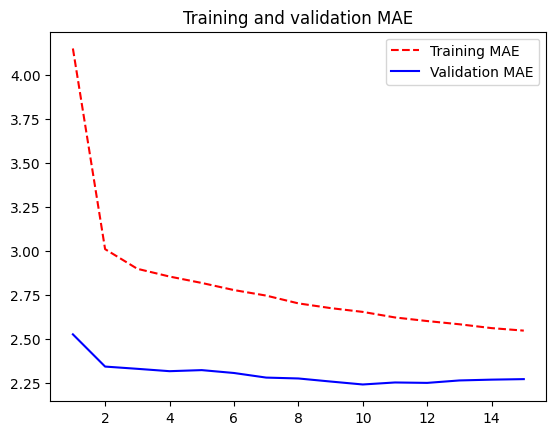



8 iteration removing  "VPdef (mbar)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - loss: 28.5621 - mae: 3.9546 - val_loss: 10.4148 - val_mae: 2.4530
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 74s 51ms/step - loss: 14.9434 - mae: 2.9905 - val_loss: 9.2348 - val_mae: 2.3479
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.9735 - mae: 2.8942 - val_loss: 8.8753 - val_mae: 2.3051
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 51s 62ms/step - loss: 13.4620 - mae: 2.8434 - val_loss: 8.8249 - val_mae: 2.2980
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 13.0717 - mae: 2.7993 - val_loss: 8.6885 - val_mae: 2.2794
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 12.5690 - mae: 2.7455 - val_loss: 8.4700 - val_mae: 2.2463
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.2168 - mae: 2.7101 - val_loss: 8.9095 - val_mae: 2.3044
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 11.8102 - mae: 2.6647 - val_loss: 8.4432 - val_mae:

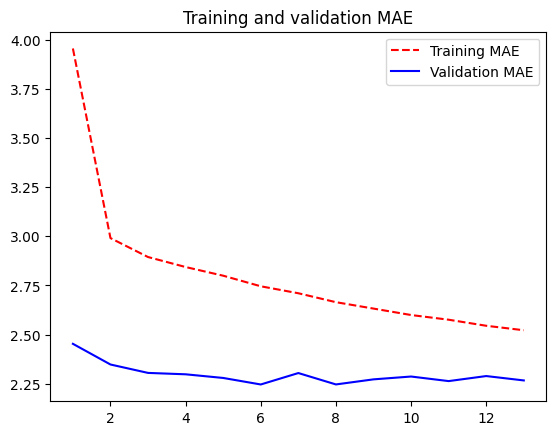



9 iteration removing  "sh (g/kg)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - loss: 32.4274 - mae: 4.1952 - val_loss: 11.2073 - val_mae: 2.5166
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - loss: 15.1224 - mae: 2.9998 - val_loss: 9.4629 - val_mae: 2.3625
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - loss: 14.0114 - mae: 2.8935 - val_loss: 9.0053 - val_mae: 2.3179
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 13.5368 - mae: 2.8458 - val_loss: 8.8709 - val_mae: 2.3097
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - loss: 13.0856 - mae: 2.8000 - val_loss: 8.6176 - val_mae: 2.2801
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.8248 - mae: 2.7708 - val_loss: 8.8772 - val_mae: 2.3161
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 12.4305 - mae: 2.7327 - val_loss: 8.7392 - val_mae: 2.3000
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 12.1200 - mae: 2.6982 - val_loss: 8.5085 - val_mae: 2.

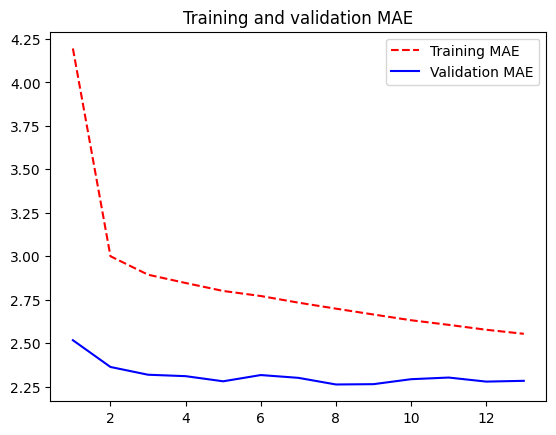



10 iteration removing  "H2OC (mmol/mol)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 61ms/step - loss: 32.1905 - mae: 4.1764 - val_loss: 11.5875 - val_mae: 2.5678
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - loss: 15.2946 - mae: 3.0108 - val_loss: 9.2406 - val_mae: 2.3324
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 14.0999 - mae: 2.9045 - val_loss: 8.8737 - val_mae: 2.3015
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - loss: 13.5692 - mae: 2.8547 - val_loss: 8.6214 - val_mae: 2.2727
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.1920 - mae: 2.8136 - val_loss: 8.5662 - val_mae: 2.2715
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 12.7706 - mae: 2.7705 - val_loss: 8.5626 - val_mae: 2.2701
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 12.4151 - mae: 2.7340 - val_loss: 8.4663 - val_mae: 2.2605
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.0983 - mae: 2.6977 - val_loss: 8.2779 - val_

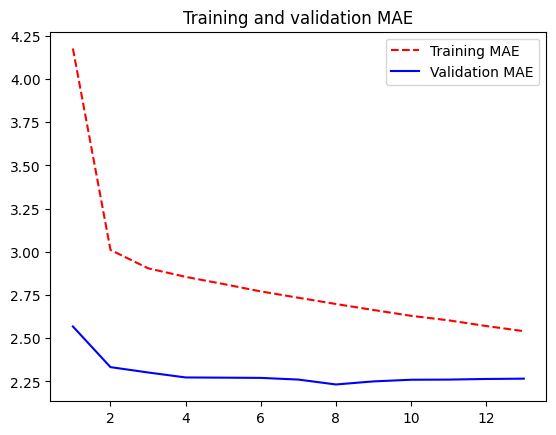



11 iteration removing  "rho (g/m**3)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - loss: 28.5413 - mae: 3.9607 - val_loss: 10.6189 - val_mae: 2.4742
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - loss: 15.0095 - mae: 2.9923 - val_loss: 9.1837 - val_mae: 2.3340
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - loss: 14.0486 - mae: 2.8979 - val_loss: 8.6126 - val_mae: 2.2649
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 13.5464 - mae: 2.8492 - val_loss: 8.4568 - val_mae: 2.2449
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 13.1675 - mae: 2.8113 - val_loss: 8.4994 - val_mae: 2.2548
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - loss: 12.7493 - mae: 2.7660 - val_loss: 8.4138 - val_mae: 2.2402
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - loss: 12.4115 - mae: 2.7297 - val_loss: 8.3139 - val_mae: 2.2262
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 12.0300 - mae: 2.6875 - val_loss: 8.3476 - val_mae

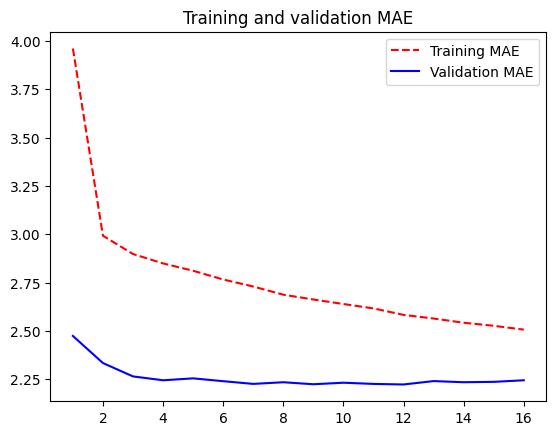



12 iteration removing  "wv (m/s)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - loss: 27.1774 - mae: 3.8735 - val_loss: 10.3815 - val_mae: 2.4542
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - loss: 14.9411 - mae: 2.9865 - val_loss: 9.0696 - val_mae: 2.3241
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - loss: 13.9571 - mae: 2.8945 - val_loss: 8.8402 - val_mae: 2.3017
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 13.5211 - mae: 2.8499 - val_loss: 8.6617 - val_mae: 2.2779
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - loss: 13.1235 - mae: 2.8058 - val_loss: 8.6144 - val_mae: 2.2775
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - loss: 12.7606 - mae: 2.7681 - val_loss: 8.4751 - val_mae: 2.2542
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - loss: 12.4440 - mae: 2.7364 - val_loss: 8.4793 - val_mae: 2.2587
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - loss: 12.0676 - mae: 2.6948 - val_loss: 8.4767 - val_mae: 2.

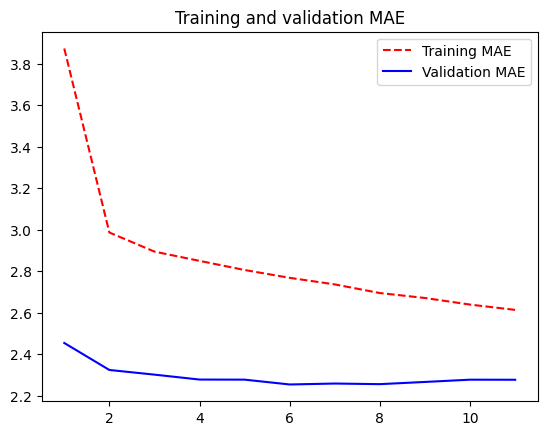



13 iteration removing  "max. wv (m/s)"
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 61ms/step - loss: 31.1478 - mae: 4.1097 - val_loss: 11.0072 - val_mae: 2.5087
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - loss: 15.3719 - mae: 3.0305 - val_loss: 9.3287 - val_mae: 2.3523
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 14.4714 - mae: 2.9498 - val_loss: 8.8099 - val_mae: 2.2982
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 14.0018 - mae: 2.9010 - val_loss: 8.7507 - val_mae: 2.2980
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 13.6365 - mae: 2.8633 - val_loss: 8.4719 - val_mae: 2.2577
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - loss: 13.1436 - mae: 2.8102 - val_loss: 8.5285 - val_mae: 2.2647
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - loss: 12.7980 - mae: 2.7774 - val_loss: 8.3881 - val_mae: 2.2494
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - loss: 12.5308 - mae: 2.7487 - val_loss: 8.3251 - val_ma

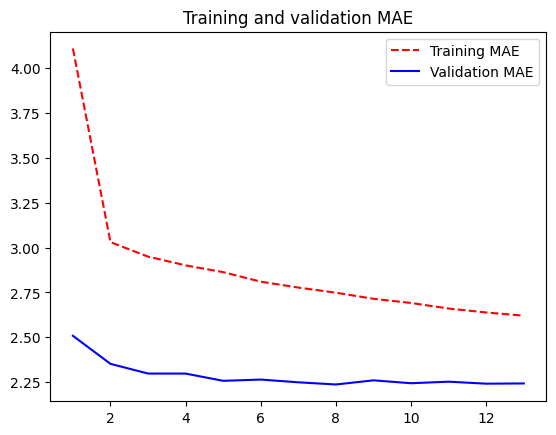

In [11]:
import keras
from keras import layers

for i in range(raw_data_original.shape[1]):
    raw_data = raw_data_original
    raw_data = np.delete(raw_data, i, axis=1)

    print(i, "iteration removing ", header[i])

    sampling_rate = 6
    sequence_length = 120
    delay = sampling_rate * (sequence_length + 24 - 1)
    batch_size = 256

    train_dataset = keras.utils.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=0,
        end_index=num_train_samples,
    )

    val_dataset = keras.utils.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=num_train_samples,
        end_index=num_train_samples + num_val_samples,
    )

    test_dataset = keras.utils.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=num_train_samples + num_val_samples,
    )

    inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
    x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
    x = layers.GRU(32, recurrent_dropout=0.5)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "jena_stacked_gru_dropout.keras", save_best_only=True
        ),
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=5,
            restore_best_weights=True
        )
    ]
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=val_dataset,
        callbacks=callbacks,
    )
    model = keras.models.load_model("jena_stacked_gru_dropout.keras")
    print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

    import matplotlib.pyplot as plt

    loss = history.history["mae"]
    val_loss = history.history["val_mae"]
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, "r--", label="Training MAE")
    plt.plot(epochs, val_loss, "b", label="Validation MAE")
    plt.title("Training and validation MAE")
    plt.legend()
    plt.show()

    print("\n================================\n")

Base case, all features
Epoch 1/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 267s 320ms/step - loss: 30.2829 - mae: 4.0478 - val_loss: 10.8293 - val_mae: 2.4864
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 253s 303ms/step - loss: 15.0297 - mae: 2.9936 - val_loss: 9.2019 - val_mae: 2.3333
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 247s 302ms/step - loss: 14.0397 - mae: 2.9012 - val_loss: 9.1276 - val_mae: 2.3342
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 265s 306ms/step - loss: 13.5684 - mae: 2.8537 - val_loss: 8.7653 - val_mae: 2.2918
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 260s 303ms/step - loss: 13.2277 - mae: 2.8147 - val_loss: 8.8229 - val_mae: 2.3025
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 261s 302ms/step - loss: 12.7832 - mae: 2.7726 - val_loss: 8.6303 - val_mae: 2.2737
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 262s 302ms/step - loss: 12.5128 - mae: 2.7456 - val_loss: 8.7558 - val_mae: 2.2878
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 248s 302ms/step - loss: 12.1048 - mae: 2.7007 - val_loss: 8.4903 - val_mae

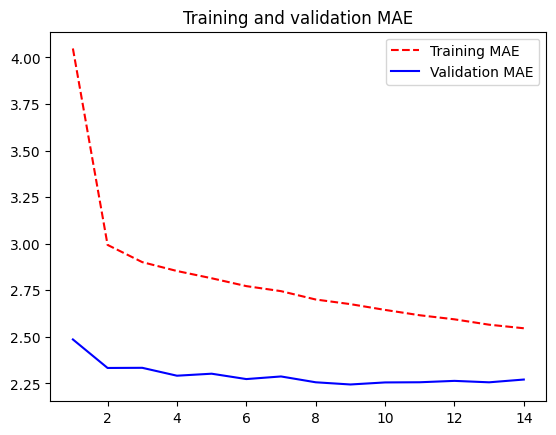

In [13]:
import keras
from keras import layers

print("Base case, all features")
raw_data = raw_data_original
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples,
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples,
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples,
)

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "jena_stacked_gru_dropout.keras", save_best_only=True
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=callbacks,
)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

import matplotlib.pyplot as plt

loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "r--", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

print("\n================================\n")

End
